In [1]:
# Import required libraries and read test and train data set
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Demonstration of Linear Regression: USA Case Study

In [2]:
summer_dataset = pd.read_csv("Generated Dataset/summer_dataset.csv")
summer_dataset = summer_dataset.drop(["Unnamed: 0"], axis = 1)
# log the GDP and Population
summer_dataset["PopulationSize"] = np.log(summer_dataset["PopulationSize"])
summer_dataset["GDPPerCapita"] = np.log(summer_dataset["GDPPerCapita"])
summer_dataset.head(10)

,CountryCode,Year,OlympicsSeason,TotalParticipants,GoldMedals,SilverMedals,BronzeMedals,TotalMedals,Win%,GDPPerCapita,...,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevWinterTotalParticipants,PrevWinterGoldMedals,PrevWinterSilverMedals,PrevWinterBronzeMedals,PrevWinterTotalMedals
0,AUS,1896,1,5,2,0,1,3,60.00,6.826319,...,0,0,0,0,0,0,0,0,0,0
1,AUT,1896,1,8,2,1,2,5,62.50,6.826319,...,0,0,0,0,0,0,0,0,0,0
2,DEN,1896,1,15,1,2,3,6,40.00,6.826319,...,0,0,0,0,0,0,0,0,0,0
3,FRA,1896,1,26,5,4,2,11,42.31,6.826319,...,0,0,0,0,0,0,0,0,0,0
4,GBR,1896,1,25,3,3,3,9,36.00,6.826319,...,0,0,0,0,0,0,0,0,0,0
5,GER,1896,1,94,25,5,2,32,34.04,6.826319,...,0,0,0,0,0,0,0,0,0,0
6,GRE,1896,1,148,10,18,20,48,32.43,6.826319,...,0,0,0,0,0,0,0,0,0,0
7,HUN,1896,1,18,2,1,3,6,33.33,6.826319,...,0,0,0,0,0,0,0,0,0,0
8,ITA,1896,1,1,0,0,0,0,0.00,6.826319,...,0,0,0,0,0,0,0,0,0,0
9,SUI,1896,1,8,1,2,0,3,37.50,6.826319,...,0,0,0,0,0,0,0,0,0,0


In [3]:
USA = pd.DataFrame(summer_dataset[(summer_dataset["CountryCode"] == "USA") & (summer_dataset["TotalParticipants"] != 0)])
USA = USA.reset_index(drop = True)
print(USA.shape)
USA

(31, 22)


,CountryCode,Year,OlympicsSeason,TotalParticipants,GoldMedals,SilverMedals,BronzeMedals,TotalMedals,Win%,GDPPerCapita,...,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevWinterTotalParticipants,PrevWinterGoldMedals,PrevWinterSilverMedals,PrevWinterBronzeMedals,PrevWinterTotalMedals
0,USA,1896,1,27,11,7,2,20,74.07,6.826319,...,0,0,0,0,0,0,0,0,0,0
1,USA,1900,2,135,30,16,17,63,46.67,6.826319,...,27,11,7,2,20,0,0,0,0,0
2,USA,1904,3,1109,128,141,125,394,35.53,6.826319,...,135,30,16,17,63,0,0,0,0,0
3,USA,1906,3,81,12,6,6,24,29.63,6.826319,...,135,30,16,17,63,0,0,0,0,0
4,USA,1908,4,219,34,16,15,65,29.68,6.826319,...,1109,128,141,125,394,0,0,0,0,0
5,USA,1908,4,219,34,16,15,65,29.68,6.826319,...,81,12,6,6,24,0,0,0,0,0
6,USA,1912,5,364,46,25,36,107,29.40,6.826319,...,219,34,16,15,65,0,0,0,0,0
7,USA,1920,7,473,111,45,38,194,41.01,6.826319,...,0,0,0,0,0,0,0,0,0,0
8,USA,1924,8,459,97,36,49,182,39.65,6.826319,...,473,111,45,38,194,41,1,10,1,12
9,USA,1928,9,426,47,24,17,88,20.66,6.826319,...,459,97,36,49,182,45,6,6,2,14


In [4]:
# the data is not enough to split the validation set
# only split data into train set and test set
USA_train = pd.DataFrame(USA[:len(summer_dataset)-1]).reset_index(drop = True)
USA_test = pd.DataFrame(USA[-1:]).reset_index(drop = True)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# create the predictors and respective train datasets
predictors = ["HostCity","GDPPerCapita","PopulationSize","TotalParticipants", "PrevTotalParticipants", "PrevGoldMedals", "PrevSilverMedals", "PrevBronzeMedals", "PrevTotalMedals",\
                  "PrevWinterTotalParticipants", "PrevWinterGoldMedals", "PrevWinterSilverMedals", "PrevWinterBronzeMedals", "PrevWinterTotalMedals"]
y_train = pd.DataFrame(USA_train["TotalMedals"])
X_train = pd.DataFrame(USA_train[predictors])

In [7]:
y_train.describe()

,TotalMedals
count,31.000000
mean,179.032258
std,92.131965
min,20.000000
25%,115.000000
50%,171.000000
75%,245.000000
max,394.000000


In [8]:
X_train.describe()

,HostCity,GDPPerCapita,PopulationSize,TotalParticipants,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevWinterTotalParticipants,PrevWinterGoldMedals,PrevWinterSilverMedals,PrevWinterBronzeMedals,PrevWinterTotalMedals
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.096774,8.361308,17.354301,543.741935,468.516129,76.516129,41.903226,38.516129,156.935484,126.387097,5.387097,9.935484,5.290323,20.612903
std,0.300537,1.665911,2.082744,245.667115,303.050147,50.178263,34.723052,30.150590,106.933292,119.124774,6.965043,15.728817,7.925459,24.640992
min,0.000000,6.826319,15.242179,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.826319,15.242179,427.000000,177.000000,32.000000,16.000000,17.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.008739,19.012188,529.000000,473.000000,87.000000,37.000000,37.000000,169.000000,97.000000,3.000000,4.000000,3.000000,14.000000
75%,0.000000,10.146157,19.362694,730.000000,720.500000,105.000000,58.000000,53.000000,224.000000,215.500000,7.500000,10.500000,5.000000,28.500000
max,1.000000,10.961079,19.593558,1109.000000,1109.000000,186.000000,141.000000,125.000000,394.000000,367.000000,25.000000,63.000000,32.000000,97.000000


C:\Users\Callista\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


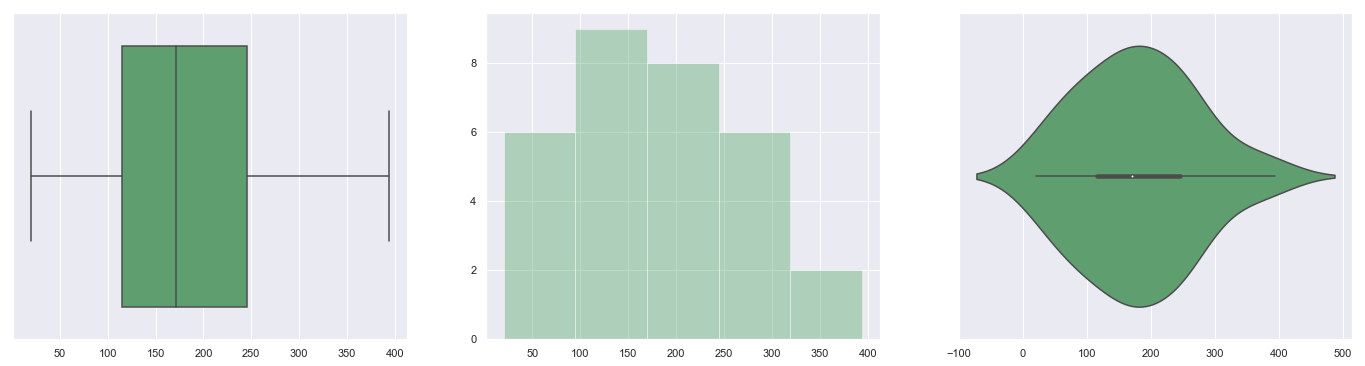

In [9]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(y_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(y_train, ax = axes[2], color = "g")

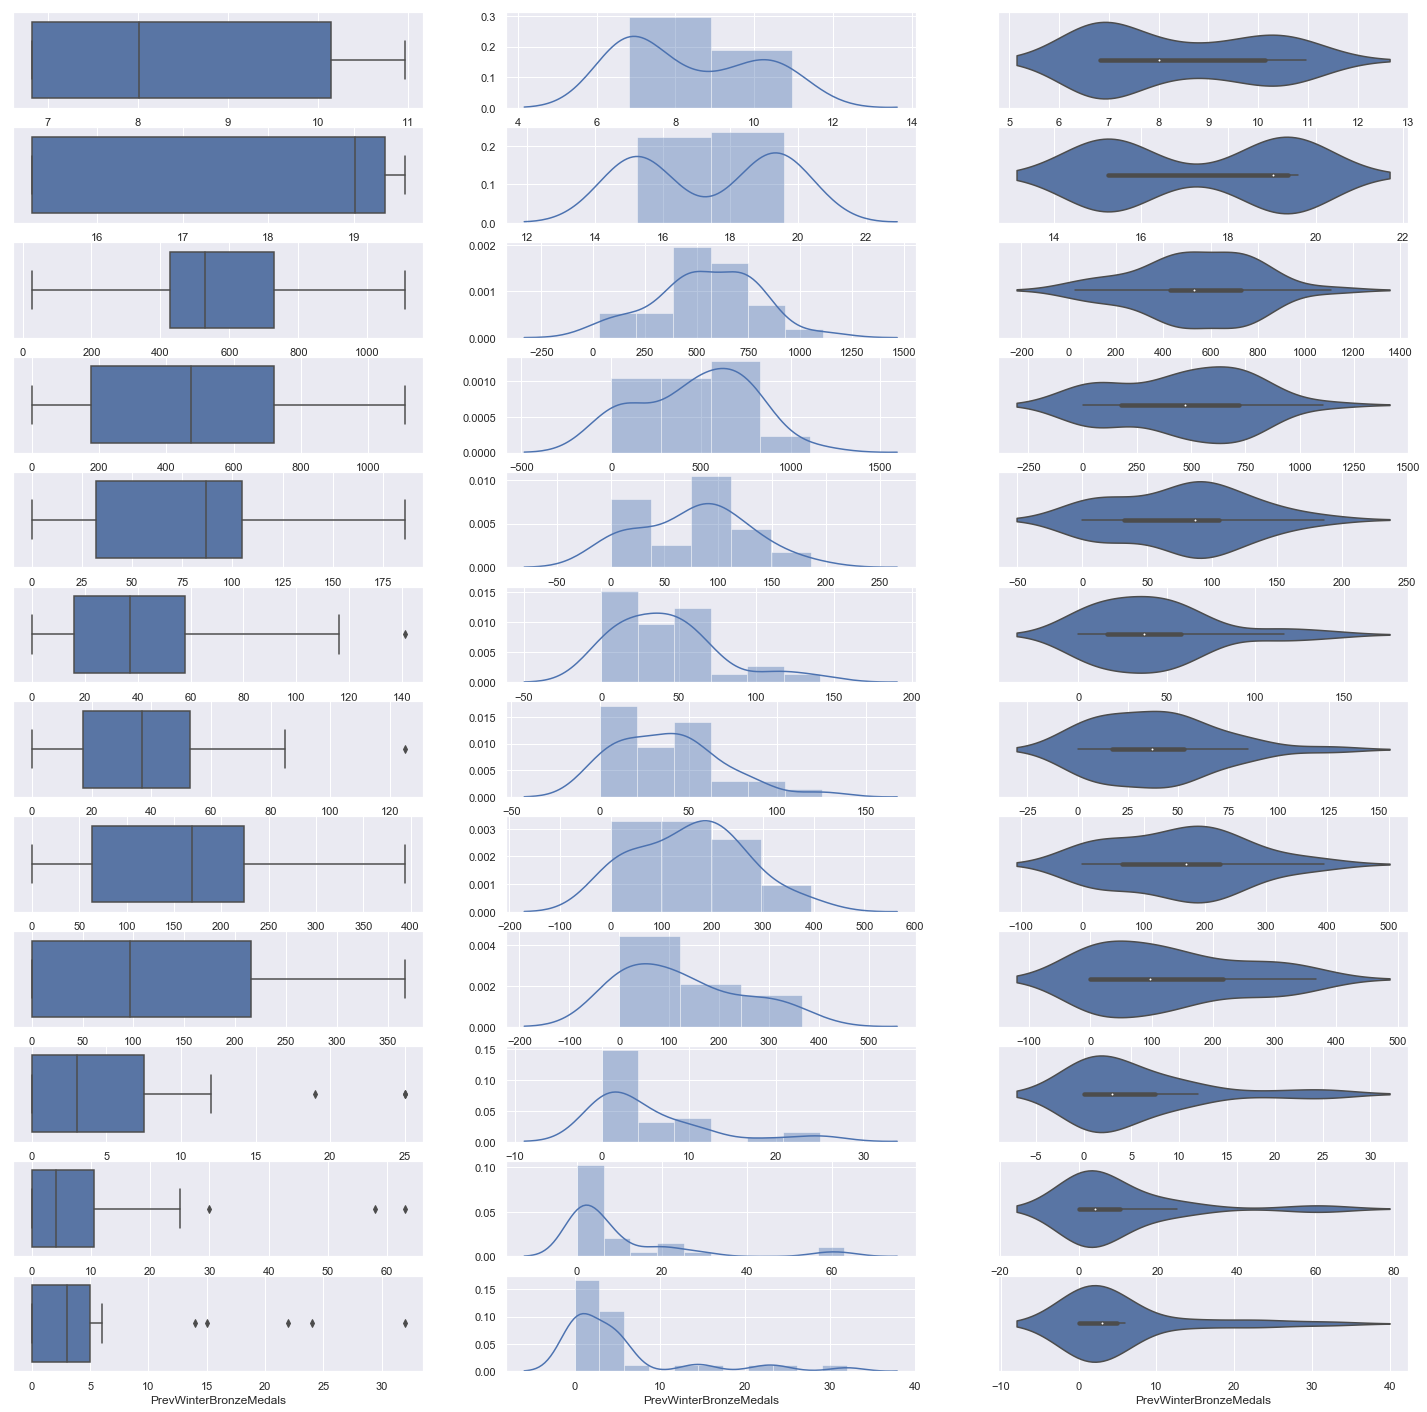

In [10]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(12, 3, figsize=(25, 25))

count = 0
for var in X_train.iloc[:,np.r_[1:13]]: # except host city
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

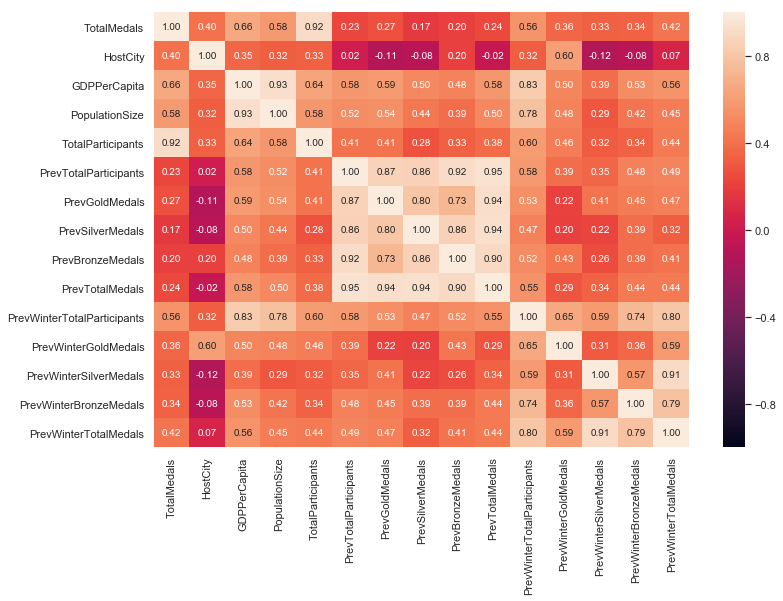

In [11]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

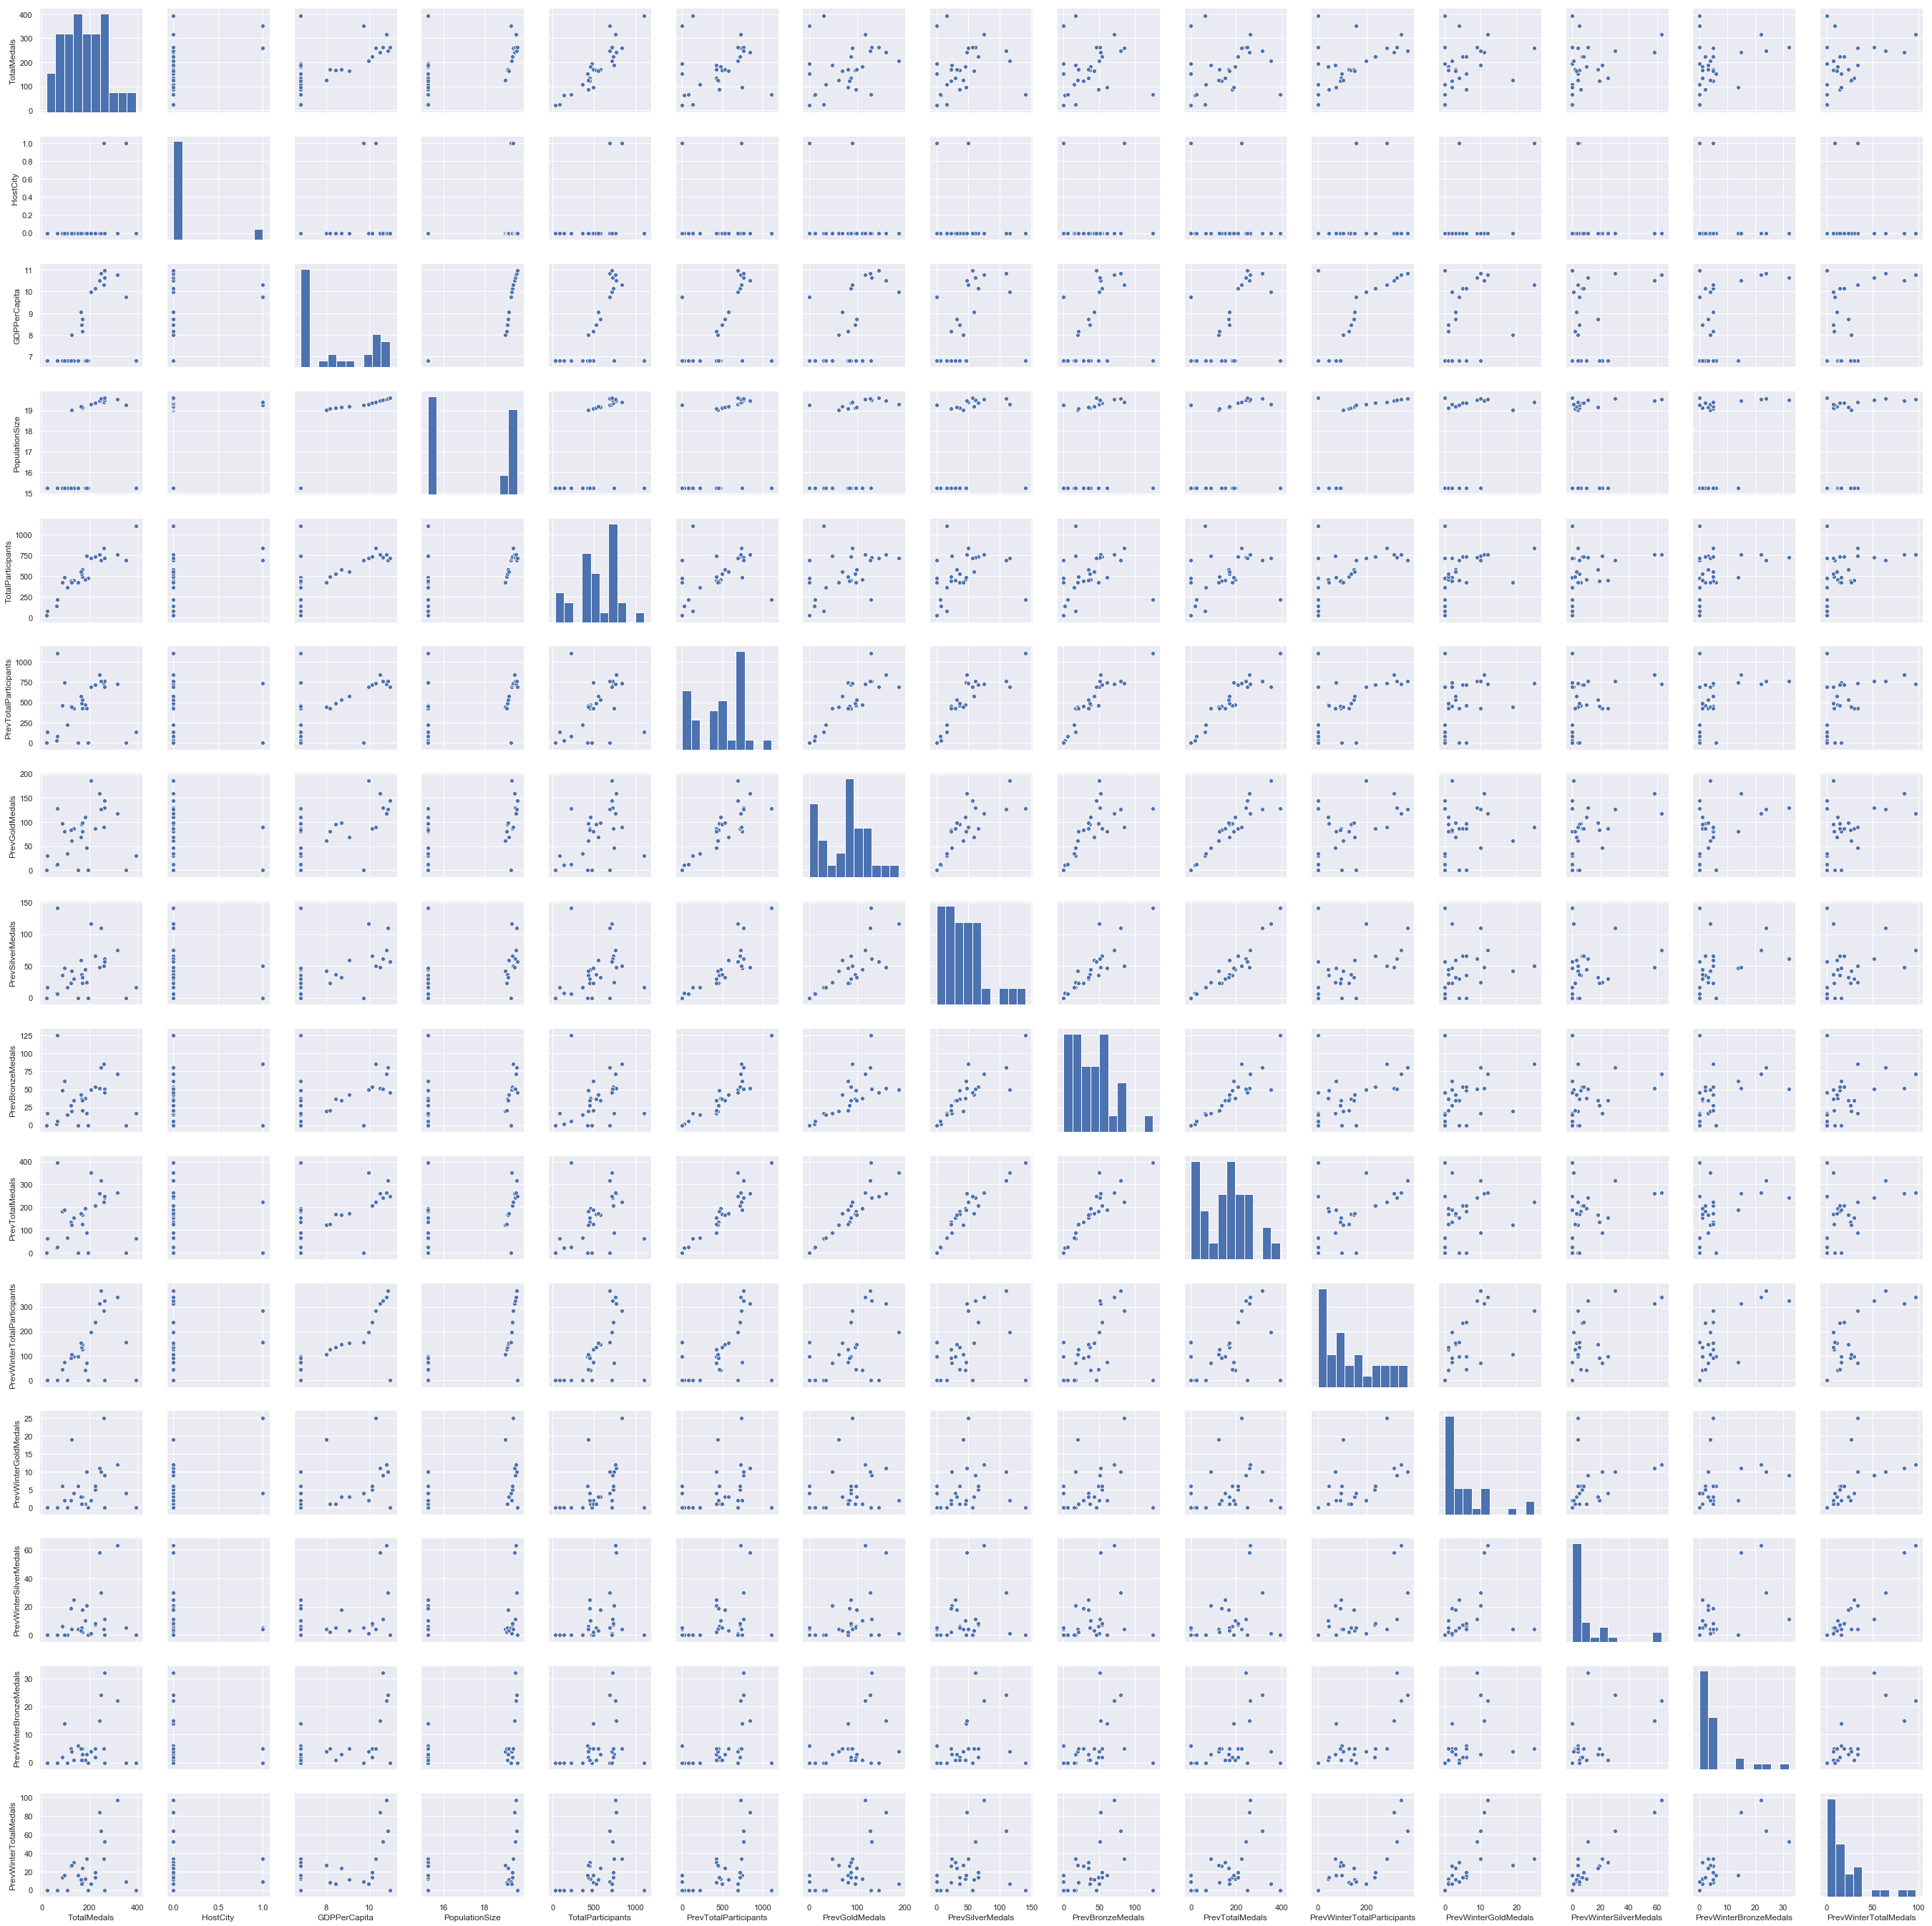

In [12]:
sb.pairplot(data = trainDF)

### Linear Regression Model

In [13]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-199.93838809]
Coefficients of Regression 	: a =  [[77.79584623  4.37993275 12.13402975  0.34620812 -0.15722237 -0.39592411
   0.38129715  0.25448135  0.23985439 -0.30229767 -2.93361041  0.99518093
   2.3398133   0.40138383]]



,Predictors,Coefficients
0,HostCity,77.795846
1,GDPPerCapita,4.379933
2,PopulationSize,12.134030
3,TotalParticipants,0.346208
4,PrevTotalParticipants,-0.157222
5,PrevGoldMedals,-0.395924
6,PrevSilverMedals,0.381297
7,PrevBronzeMedals,0.254481
8,PrevTotalMedals,0.239854
9,PrevWinterTotalParticipants,-0.302298


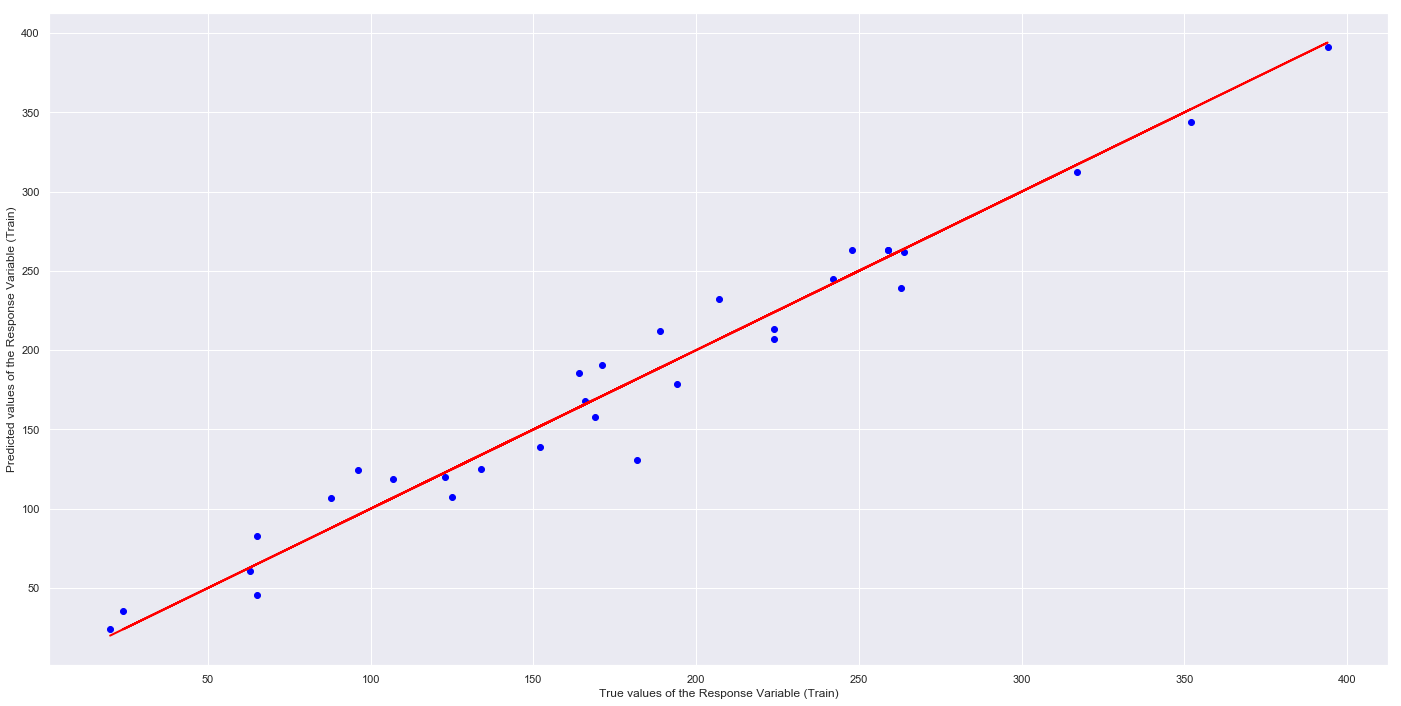

In [14]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_train, y_train_pred, color = "blue")
axes.plot(y_train, y_train, 'w-', linewidth = 2, color = "red")
axes.set_xlabel("True values of the Response Variable (Train)")
axes.set_ylabel("Predicted values of the Response Variable (Train)")
plt.show()

In [15]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.964570789296443
Mean Squared Error (MSE) 	: 291.03264301846195



In [16]:
y_test = pd.DataFrame(USA_test["TotalMedals"])
X_test = pd.DataFrame(USA_test[predictors])

y_test_pred = linreg.predict(X_test)

print("The true medals:", list(y_test["TotalMedals"])[0])
print("The predicted medals:", int(list(y_test_pred)[0][0].round()))

The true medals: 264
The predicted medals: 262


#### The prediction of the example USA is rather accurate

## Linear Regression for the whole dataset

In [17]:
# winter dataset
winter_dataset = pd.read_csv("Generated Dataset/winter_dataset.csv")
winter_dataset = winter_dataset.drop(["Unnamed: 0"], axis = 1)
winter_dataset["PopulationSize"] = np.log(winter_dataset["PopulationSize"])
winter_dataset["GDPPerCapita"] = np.log(winter_dataset["GDPPerCapita"])
winter_dataset.head(10)

,CountryCode,Year,OlympicsSeason,TotalParticipants,GoldMedals,SilverMedals,BronzeMedals,TotalMedals,Win%,GDPPerCapita,...,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevSummerTotalParticipants,PrevSummerGoldMedals,PrevSummerSilverMedals,PrevSummerBronzeMedals,PrevSummerTotalMedals
0,AUS,1924,8,1,1,0,0,1,100.00,8.254516,...,0,0,0,0,0,60,3,5,2,10
1,AUT,1924,8,4,3,1,0,4,100.00,8.254516,...,0,0,0,0,0,56,0,3,1,4
2,BEL,1924,8,32,0,0,5,5,15.62,8.254516,...,0,0,0,0,0,234,3,30,6,39
3,CAN,1924,8,17,9,0,0,9,52.94,8.254516,...,0,0,0,0,0,83,0,19,1,20
4,CZE,1924,8,31,0,0,0,0,0.00,8.254516,...,0,0,0,0,0,242,1,4,5,10
5,FIN,1924,8,33,4,8,3,15,45.45,8.254516,...,0,0,0,0,0,253,24,13,15,52
6,FRA,1924,8,68,0,0,10,10,14.71,8.254516,...,0,0,0,0,0,636,37,51,22,110
7,GBR,1924,8,50,16,4,11,31,62.00,8.254516,...,0,0,0,0,0,428,15,30,19,64
8,HUN,1924,8,6,0,0,0,0,0.00,8.254516,...,0,0,0,0,0,140,2,12,8,22
9,IND,1924,8,7,7,0,0,7,100.00,8.254516,...,0,0,0,0,0,24,0,0,0,0


In [18]:
# dataset of 2020 Olympics
summer_dataset_2020 = pd.read_csv("Generated Dataset/2020 Olympics.csv")
# log the GDP and Population
summer_dataset_2020["PopulationSize"] = np.log(summer_dataset_2020["PopulationSize"])
summer_dataset_2020["GDPPerCapita"] = np.log(summer_dataset_2020["GDPPerCapita"])
summer_dataset_2020.head(10)

,CountryCode,Year,OlympicsSeason,TotalParticipants,GoldMedals,SilverMedals,BronzeMedals,TotalMedals,Win%,GDPPerCapita,...,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevWinterTotalParticipants,PrevWinterGoldMedals,PrevWinterSilverMedals,PrevWinterBronzeMedals,PrevWinterTotalMedals
0,AFG,2016,NaN,3,NaN,NaN,NaN,NaN,NaN,6.091294,...,3,0,0,0,0,0,0,0,0,0
1,ALB,2016,NaN,6,NaN,NaN,NaN,NaN,NaN,8.350814,...,6,0,0,0,0,2,0,0,0,0
2,ALG,2016,NaN,74,NaN,NaN,NaN,NaN,NaN,8.462153,...,74,0,2,0,2,0,0,0,0,0
3,AND,2016,NaN,4,NaN,NaN,NaN,NaN,NaN,10.754391,...,4,0,0,0,0,12,0,0,0,0
4,ANG,2016,NaN,26,NaN,NaN,NaN,NaN,NaN,8.380535,...,26,0,0,0,0,0,0,0,0,0
5,ANT,2016,NaN,9,NaN,NaN,NaN,NaN,NaN,9.720109,...,9,0,0,0,0,0,0,0,0,0
6,ARG,2016,NaN,232,NaN,NaN,NaN,NaN,NaN,9.059287,...,232,21,1,0,22,20,0,0,0,0
7,ARM,2016,NaN,34,NaN,NaN,NaN,NaN,NaN,8.521416,...,34,1,3,0,4,6,0,0,0,0
8,ARU,2016,NaN,7,NaN,NaN,NaN,NaN,NaN,10.326632,...,7,0,0,0,0,0,0,0,0,0
9,ASA,2016,NaN,4,NaN,NaN,NaN,NaN,NaN,9.581031,...,4,0,0,0,0,0,0,0,0,0


In [19]:
# if the data is too few (less than 3), simply drop it
NOC_values = dict(summer_dataset.groupby("CountryCode")["CountryCode"].value_counts())
ignore_value = []
for key in NOC_values:
    if NOC_values[key] <= 3:
        ignore_value.append(key[0])
ignore_value

['AHO', 'ANZ', 'CRT', 'MHL', 'MNE', 'NFL', 'TPE', 'TUV', 'UNK']

In [20]:
# finalize the dataset for 2020 Olympic prediction with provided data not less than 3
summer_dataset_2020 = pd.DataFrame(summer_dataset_2020[(~(summer_dataset_2020["CountryCode"].isin(ignore_value)))]).reset_index(drop = True)
NOC_2020 = pd.DataFrame(list(summer_dataset_2020["CountryCode"]))
NOC_2020.columns = ["Country"]
summer_dataset_2020.head()

,CountryCode,Year,OlympicsSeason,TotalParticipants,GoldMedals,SilverMedals,BronzeMedals,TotalMedals,Win%,GDPPerCapita,...,PrevTotalParticipants,PrevGoldMedals,PrevSilverMedals,PrevBronzeMedals,PrevTotalMedals,PrevWinterTotalParticipants,PrevWinterGoldMedals,PrevWinterSilverMedals,PrevWinterBronzeMedals,PrevWinterTotalMedals
0,AFG,2016,NaN,3,NaN,NaN,NaN,NaN,NaN,6.091294,...,3,0,0,0,0,0,0,0,0,0
1,ALB,2016,NaN,6,NaN,NaN,NaN,NaN,NaN,8.350814,...,6,0,0,0,0,2,0,0,0,0
2,ALG,2016,NaN,74,NaN,NaN,NaN,NaN,NaN,8.462153,...,74,0,2,0,2,0,0,0,0,0
3,AND,2016,NaN,4,NaN,NaN,NaN,NaN,NaN,10.754391,...,4,0,0,0,0,12,0,0,0,0
4,ANG,2016,NaN,26,NaN,NaN,NaN,NaN,NaN,8.380535,...,26,0,0,0,0,0,0,0,0,0


In [21]:
# to check if there is any Null value in 2020 Olympic dataset
predictors = ["HostCity","GDPPerCapita","PopulationSize","TotalParticipants", "PrevTotalParticipants", "PrevGoldMedals", "PrevSilverMedals", "PrevBronzeMedals", "PrevTotalMedals",\
                      "PrevWinterTotalParticipants", "PrevWinterGoldMedals", "PrevWinterSilverMedals", "PrevWinterBronzeMedals", "PrevWinterTotalMedals"]
temp = pd.DataFrame(summer_dataset_2020[predictors])
temp.isnull().any()

HostCity                       False
GDPPerCapita                   False
PopulationSize                 False
TotalParticipants              False
PrevTotalParticipants          False
PrevGoldMedals                 False
PrevSilverMedals               False
PrevBronzeMedals               False
PrevTotalMedals                False
PrevWinterTotalParticipants    False
PrevWinterGoldMedals           False
PrevWinterSilverMedals         False
PrevWinterBronzeMedals         False
PrevWinterTotalMedals          False
dtype: bool

In [22]:
# function to make predictions of a specific country
def linear_regression_prediction(NOC, season): # the input should be 2 strings
    if season == "Summer":
        dataset = summer_dataset
        predictors = ["HostCity","GDPPerCapita","PopulationSize","TotalParticipants", "PrevTotalParticipants", "PrevGoldMedals", "PrevSilverMedals", "PrevBronzeMedals", "PrevTotalMedals",\
                      "PrevWinterTotalParticipants", "PrevWinterGoldMedals", "PrevWinterSilverMedals", "PrevWinterBronzeMedals", "PrevWinterTotalMedals"]
    elif season == "Winter":
        dataset = winter_dataset
        predictors = ["HostCity","GDPPerCapita","PopulationSize","TotalParticipants", "PrevTotalParticipants", "PrevGoldMedals", "PrevSilverMedals", "PrevBronzeMedals", "PrevTotalMedals",\
                      "PrevSummerTotalParticipants", "PrevSummerGoldMedals", "PrevSummerSilverMedals", "PrevSummerBronzeMedals", "PrevSummerTotalMedals"]
    
    Country = pd.DataFrame(dataset[(dataset["CountryCode"] == NOC) & (dataset["TotalParticipants"] != 0)])
    Country = Country.reset_index(drop = True)

    # if the country has too few data, just ignore it
    if (len(Country) <= 3):
            return ["No Value", "No Value"]

    # the data is not enough to split the validation set
    # only split data into train set and test set
    NOC_train = pd.DataFrame(Country[:len(dataset)-1]).reset_index(drop = True)
    NOC_test = pd.DataFrame(Country[-1:]).reset_index(drop = True)

    # LinearRegression
    
    y_train = pd.DataFrame(NOC_train["TotalMedals"])
    X_train = pd.DataFrame(NOC_train[predictors])

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)

    y_test = pd.DataFrame(NOC_test["TotalMedals"])
    X_test = pd.DataFrame(NOC_test[predictors])

    y_test_pred = linreg.predict(X_test)
    
    # to predict 2020
    if season == "Summer":
        if NOC in summer_dataset_2020["CountryCode"].tolist():
            X_test_2020 = pd.DataFrame(summer_dataset_2020[summer_dataset_2020["CountryCode"] == NOC][predictors])
            y_test_pred_2020 = linreg.predict(X_test_2020)
            temp = list(y_test_pred_2020)[0][0]
            if temp < 0:
                temp = 0
            result_2020 = int(round(temp))
        else:
            result_2020 = "n"

        return [list(NOC_test["Year"])[0], list(y_test["TotalMedals"])[0], int(list(y_test_pred)[0][0].round()), result_2020]
    
    elif season == "Winter":
        return [list(NOC_test["Year"])[0], list(y_test["TotalMedals"])[0], int(list(y_test_pred)[0][0].round())]

In [23]:
# function to apply prediction to each countries: feed the data of every countries into the model one-by-one
def prediction_implementation(season): # the input should be a string
    if season == "Summer":
        dataset = summer_dataset
    elif season == "Winter":
        dataset = winter_dataset
        
    # generate the list of predicted value
    NOC_neat = list(dataset["CountryCode"].unique())
    NOC_neat.sort()
    print(NOC_neat)
    year = []
    true_value = []
    prediction = []
    remove_list = []
    result_2020 = []
    for i in NOC_neat:
        # call the prediction function
        NOC = linear_regression_prediction(i, season)
        if (type(NOC[0]) != str):
            year.append(NOC[0])
            true_value.append(NOC[1])
            prediction.append(NOC[2])
            if season == "Summer":
                #print(NOC[3])
                if (type(NOC[3]) != str):
                    result_2020.append(NOC[3])            
        else:
            print(i) # print out the countries that is dropped
            remove_list.append(i)
            
    # generate the dataframe of predicted value and true value        
    NOC_final = NOC_neat.copy()
    for i in range(len(remove_list)):
        NOC_final.remove(remove_list[i])

    NOC_df = pd.DataFrame(NOC_final)
    year_df = pd.DataFrame(year)
    True_df = pd.DataFrame(true_value)
    Prediction_df = pd.DataFrame(prediction)
    result_2020_df = pd.DataFrame(result_2020)
    result_2020_df = result_2020_df.reset_index(drop = True)

    Result = pd.concat([NOC_df, year_df, True_df, Prediction_df], axis = 1)
    Result.columns = ["Country", "Year", "True Value", "Predicted Value"]

    if season == "Summer":
        result_2020_df = pd.concat([NOC_2020, result_2020_df], axis = 1)
        result_2020_df.columns = ["Country", "Predicted Medals"]
        return (Result, true_value, prediction, result_2020_df)
    elif season == "Winter":
        return (Result, true_value, prediction)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#### Summer Dataset

In [25]:
result_summer = prediction_implementation("Summer")
Result_summer = result_summer[0]
true_value_summer = result_summer[1]
prediction_summer = result_summer[2]
    
print("Test Explained Variance (R^2) of Summer Olympics \t:", explained_variance_score(true_value_summer, prediction_summer))
print("Test Mean Squared Error (MSE) of Summer Olympics \t:", mean_squared_error(true_value_summer, prediction_summer))
print()

['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG', 'ARM', 'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAN', 'BAR', 'BDI', 'BEL', 'BEN', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH', 'BOL', 'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM', 'CAN', 'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP', 'CZE', 'DEN', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ESA', 'ESP', 'EST', 'ETH', 'FIJ', 'FIN', 'FRA', 'FSM', 'GAB', 'GAM', 'GBR', 'GBS', 'GEO', 'GEQ', 'GER', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI', 'GUM', 'GUY', 'HAI', 'HKG', 'HON', 'HUN', 'INA', 'IND', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'KSA', 'KUW', 'LAO', 'LAT', 'LBA', 'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAR', 'MAS', 'MAW', 'MDA', 'MDV', 'MEX', 'MGL', 'MHL', 'MKD', 'MLI', 'MLT', 'MNE', 'MON', 'MOZ', 'MRI', 'MTN', 'MYA', 'NAM', 'NCA', 'NED', 'NEP', 'NFL', 'NGR', 'NIG', 'NOR', 'NRU', 'NZL', 'OMA'

#### Winter Dataset

In [26]:
result_winter = prediction_implementation("Winter")
Result_winter = result_winter[0]
true_value_winter = result_winter[1]
prediction_winter = result_winter[2]

print("Test Explained Variance (R^2) of Winter Olympics \t:", explained_variance_score(true_value_winter, prediction_winter))
print("Test Mean Squared Error (MSE) of Winter Olympics \t:", mean_squared_error(true_value_winter, prediction_winter))
print()

['ALB', 'ALG', 'AND', 'ARG', 'ARM', 'ASA', 'AUS', 'AUT', 'AZE', 'BEL', 'BIH', 'BLR', 'BOL', 'BRA', 'BUL', 'CAN', 'CAY', 'CHI', 'CHN', 'CMR', 'COL', 'CRC', 'CRO', 'CYP', 'CZE', 'DEN', 'DMA', 'EGY', 'ESP', 'EST', 'ETH', 'FIJ', 'FIN', 'FRA', 'GBR', 'GEO', 'GER', 'GHA', 'GRE', 'GUA', 'GUM', 'HKG', 'HON', 'HUN', 'IND', 'IRI', 'IRL', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KOR', 'LAT', 'LIB', 'LIE', 'LTU', 'LUX', 'MAD', 'MAR', 'MDA', 'MEX', 'MGL', 'MKD', 'MLT', 'MNE', 'MON', 'NED', 'NEP', 'NOR', 'NZL', 'PAK', 'PAR', 'PER', 'PHI', 'POL', 'POR', 'PRK', 'PUR', 'ROU', 'RSA', 'RUS', 'SEN', 'SLO', 'SMR', 'SRB', 'SUI', 'SVK', 'SWE', 'SWZ', 'TGA', 'THA', 'TJK', 'TLS', 'TOG', 'TRI', 'TUR', 'UKR', 'URU', 'USA', 'UZB', 'VEN', 'ZIM']
ALB
ALG
ASA
CAY
CMR
COL
DMA
EGY
ETH
FIJ
GHA
GUA
GUM
HON
IVB
KEN
MAD
MLT
MNE
PAK
PAR
PER
SWZ
TGA
THA
TLS
TOG
TRI
URU
ZIM
Test Explained Variance (R^2) of Winter Olympics 	: 0.9859692853622937
Test Mean Squared Error (MSE) of Winter Olympics 	: 

In [27]:
Olympic_2020 = result_summer[3]

In [32]:
print(Olympic_2020.shape)
Olympic_2020

(194, 2)


,Country,Predicted Medals
0,AFG,1
1,ALB,0
2,ALG,0
3,AND,0
4,ANG,0
5,ANT,0
6,ARG,62
7,ARM,6
8,ARU,0
9,ASA,0


In [29]:
# create the csv file
Result_summer.to_csv("Results/Summer - Linear Regression Model.csv", index = 0)

In [30]:
Result_winter.to_csv("Results/Winter - Linear Regression Model.csv", index = 0)

In [31]:
Olympic_2020.to_csv("Results/Summer 2020 - Linear Regression Model.csv", index = 0)